In [117]:
import re
import string
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


**1.DATA COLLECTION**

In [118]:

df=pd.read_csv(r'C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task1\Task1 Database\twitter_training.csv')
df

id        Media Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Massage  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [119]:
df.head()

id        Media Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Massage  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [120]:
print(df.columns)
print( )
print('length of data is =',len(df))
print('Shape of data = ',df.shape)


Index(['id', 'Media', 'Sentiment', 'Massage'], dtype='object')

length of data is = 74682
Shape of data =  (74682, 4)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   Media      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Massage    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [122]:
df.dtypes

id            int64
Media        object
Sentiment    object
Massage      object
dtype: object

**2.TEXT PREPROCESSING**

In [123]:
np.sum(df.isnull().any(axis=1))


686

In [124]:
Null_df=df.notnull()
Null_df

id  Media  Sentiment  Massage
0      True   True       True     True
1      True   True       True     True
2      True   True       True     True
3      True   True       True     True
4      True   True       True     True
...     ...    ...        ...      ...
74677  True   True       True     True
74678  True   True       True     True
74679  True   True       True     True
74680  True   True       True     True
74681  True   True       True     True

[74682 rows x 4 columns]

In [125]:
df=df.dropna()
df

id        Media Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Massage  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[73996 rows x 4 columns]

In [126]:
df.shape

(73996, 4)

In [127]:
np.sum(df.isnull().any(axis=1))

0

In [128]:
Train_data=df[['Massage','Sentiment']]

In [129]:
Train_data['Sentiment']= Train_data['Sentiment'].replace('POSITIVE','NEGATIVE') 
Train_data['Sentiment']= Train_data['Sentiment'].replace('NEUTRAL','IRRELEVANT')

pos_data= Train_data[Train_data['Sentiment']== 'POSITIVE']
neg_data= Train_data[Train_data['Sentiment']=='NEGATIVE']
neutral_data= Train_data[Train_data['Sentiment']=='NEUTRAL']
irrel_data= Train_data[Train_data['Sentiment']=='IRRELEVANT']

C:\Users\salam_jmvmbso\AppData\Local\Temp\ipykernel_12992\1072750898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data['Sentiment']= Train_data['Sentiment'].replace('POSITIVE','NEGATIVE')
C:\Users\salam_jmvmbso\AppData\Local\Temp\ipykernel_12992\1072750898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data['Sentiment']= Train_data['Sentiment'].replace('NEUTRAL','IRRELEVANT')


In [130]:
pos_data=pos_data.iloc[:int(15000)]
neg_data=neg_data.iloc[:int(15000)]
neutral_data=neutral_data.iloc[:int(15000)]
irrel_data=irrel_data.iloc[:int(15000)]

C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

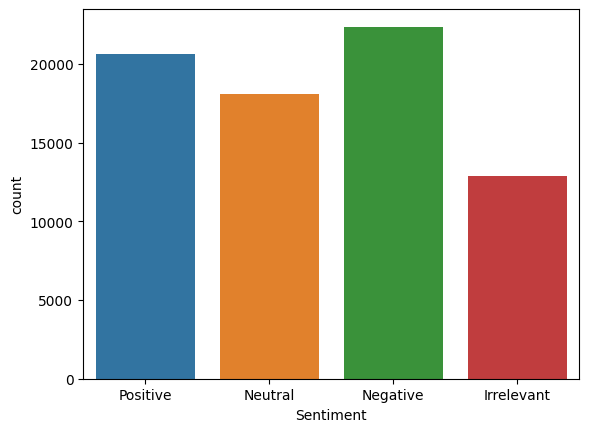

In [131]:
sns.countplot(x="Sentiment",data=df)

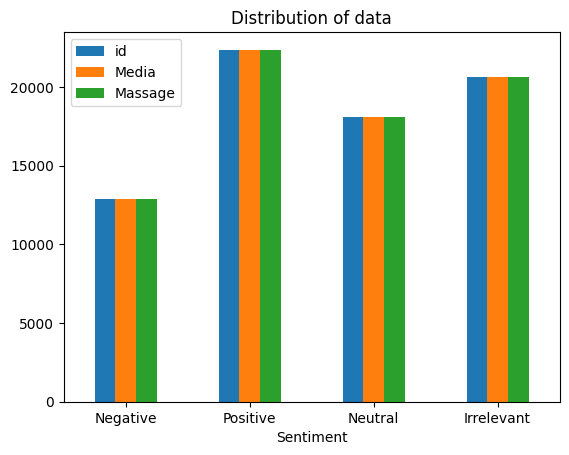

In [132]:
SS=df.groupby('Sentiment').count().plot(kind='bar',title='Distribution of data',legend=True)
SS.set_xticklabels(["Negative","Positive","Neutral","Irrelevant"], rotation=0)
Massage, sentiment = list(df['Massage']),list(df['id'])

In [133]:
dataset=pd.concat([pos_data,neg_data,neutral_data,irrel_data])

In [134]:
dataset['Massage']=dataset['Massage'].str.lower()
dataset['Massage'].tail()

Series([], Name: Massage, dtype: object)

In [135]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [136]:
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(Massage):
    return " ".join([word for word in str(Massage).split() if word not in STOPWORDS])
dataset['Massage'] = dataset['Massage'].apply(lambda text: cleaning_stopwords(text))
dataset['Massage'].head()


Series([], Name: Massage, dtype: object)

In [137]:
eng_Punctuation = string.punctuation
punctuation_list=eng_Punctuation
def clean_punctuation(Massage):
    translator = str.maketrans('', '',punctuation_list)
    return Massage.translate(translator)
dataset['Massage']= dataset['Massage'].apply(lambda x: clean_punctuation(x))
dataset['Massage'].tail()


Series([], Name: Massage, dtype: object)

In [138]:
def clean_repeating_char(Massage):
    return re.sub(r'(.)1+', r'1', Massage)
dataset['Massage'] = dataset['Massage'].apply(lambda x: clean_repeating_char(x))
dataset['Massage'].tail()

def clean_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Massage'] = dataset['Massage'].apply(lambda x: clean_URLs(x))
dataset['Massage'].tail()

def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Massage'] = dataset['Massage'].apply(lambda x: clean_numbers(x))
dataset['Massage'].tail()

tokenizer = RegexpTokenizer(r'w+')
dataset['Massage'] = dataset['Massage'].apply(tokenizer.tokenize)
dataset['Massage'].head()

Series([], Name: Massage, dtype: object)

In [139]:
stemming = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [stemming.stem(word) for word in data]
    return data
dataset['Massage']= dataset['Massage'].apply(lambda x: stemming_on_text(x))
dataset['Massage'].head()

lemmatizer = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data
dataset['Massage'] = dataset['Massage'].apply(lambda x: lemmatizer_on_text(x))
dataset['Massage'].head()

Series([], Name: Massage, dtype: object)

In [140]:
X=Train_data.Massage
Y=Train_data.Sentiment

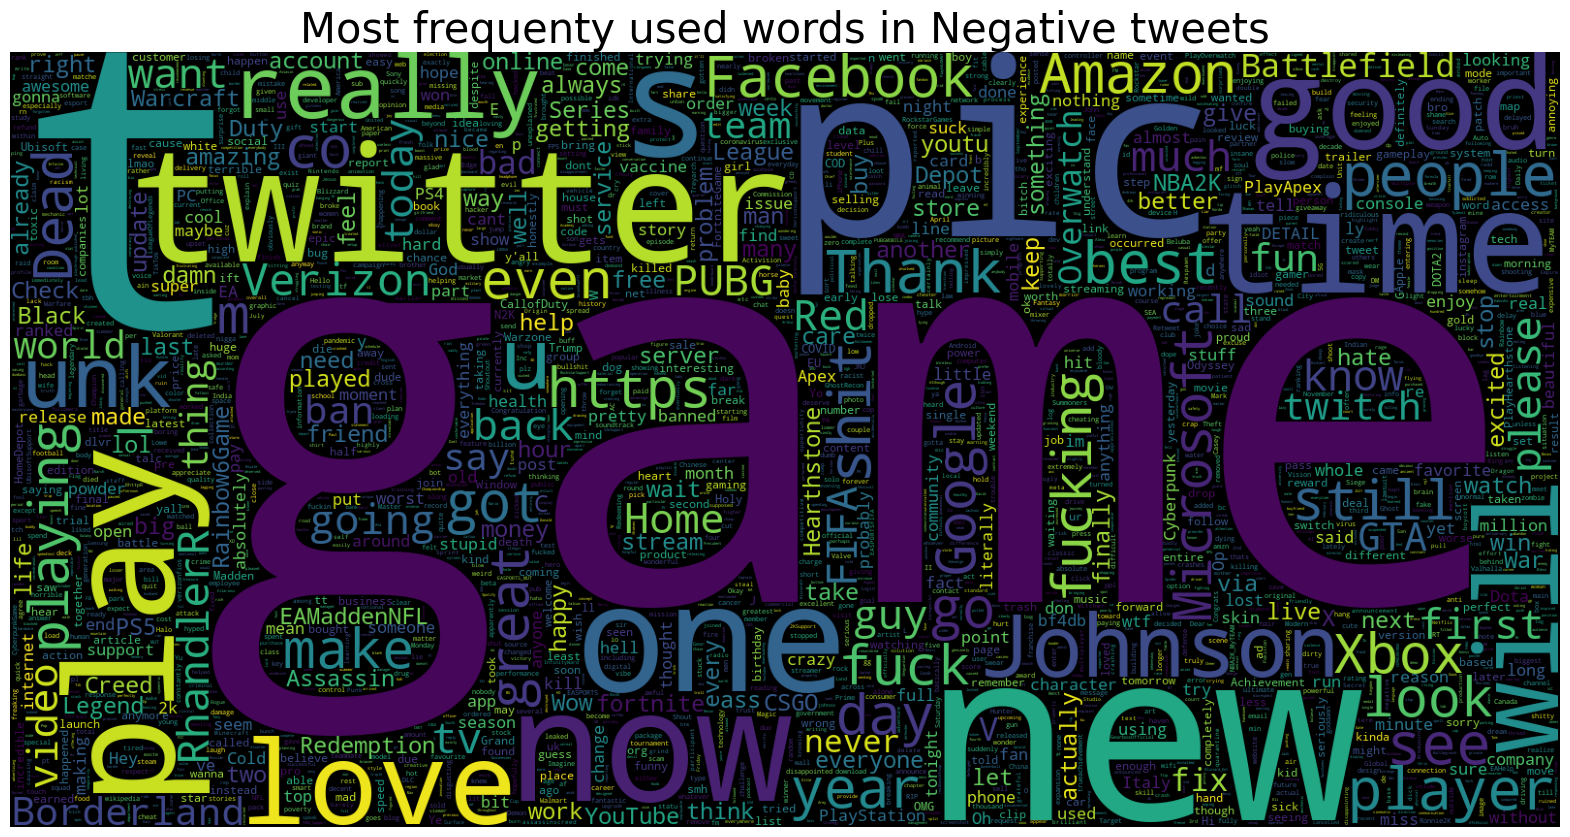

In [141]:
neg_data = Train_data['Massage'][:70000]
plt.figure(figsize=(20,15))
wc = WordCloud(max_words = 10000, width = 1600, height=800, collocations=False).generate(" ".join(neg_data))
plt.axis('off')
plt.title('Most frequenty used words in Negative tweets',fontsize = 30)
plt.imshow(wc)


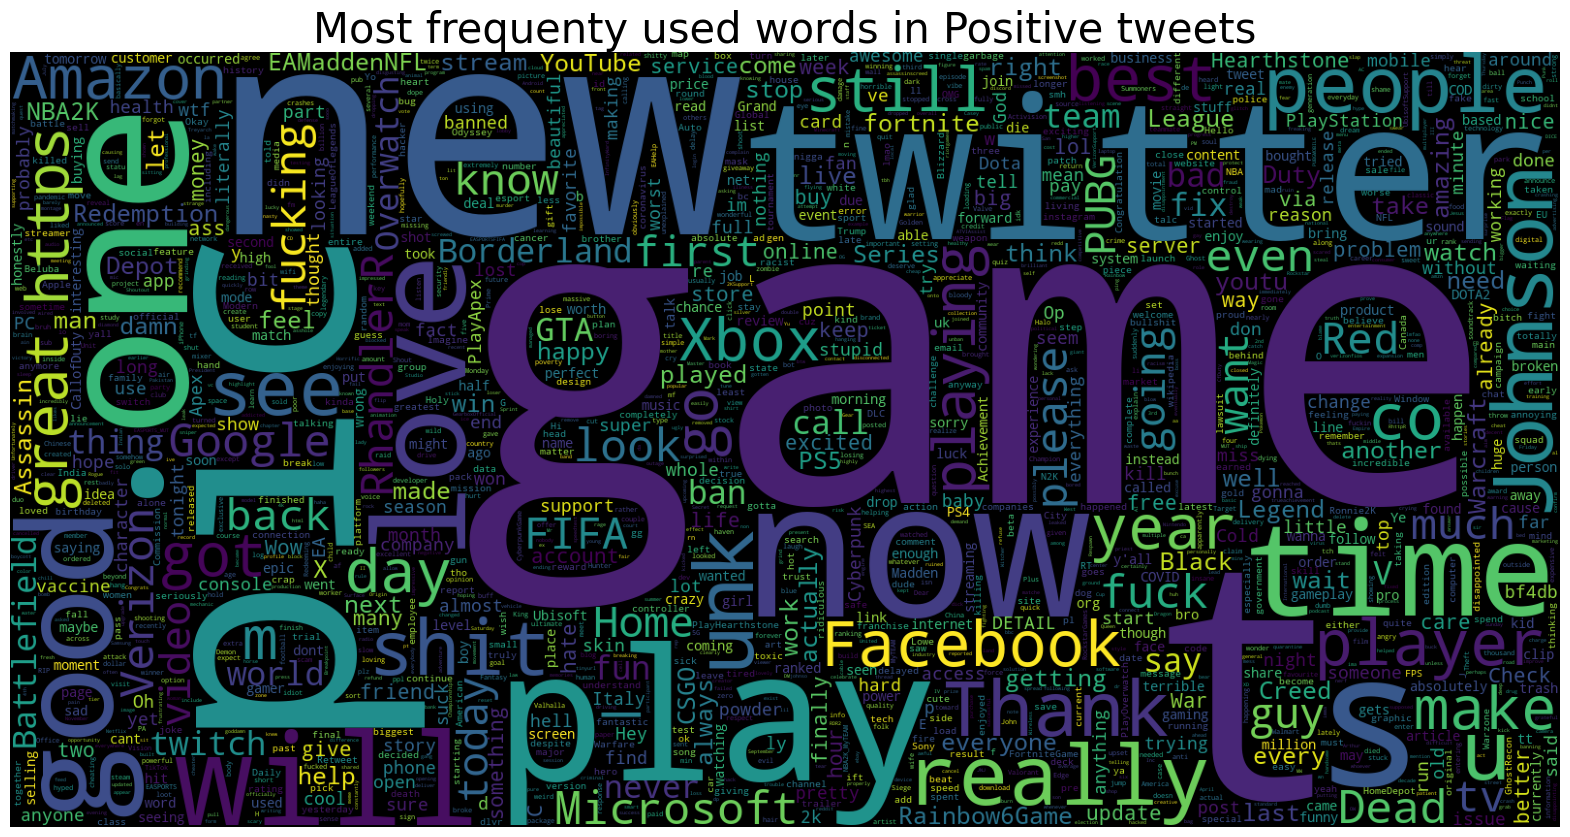

In [142]:
pos_data = Train_data['Massage'][:70000]
plt.figure(figsize=(20,15))
wc = WordCloud(max_words = 10000, width = 1600, height=800, collocations=False).generate(" ".join(pos_data))
plt.axis('off')
plt.title('Most frequenty used words in Positive tweets',fontsize = 30)
plt.imshow(wc)


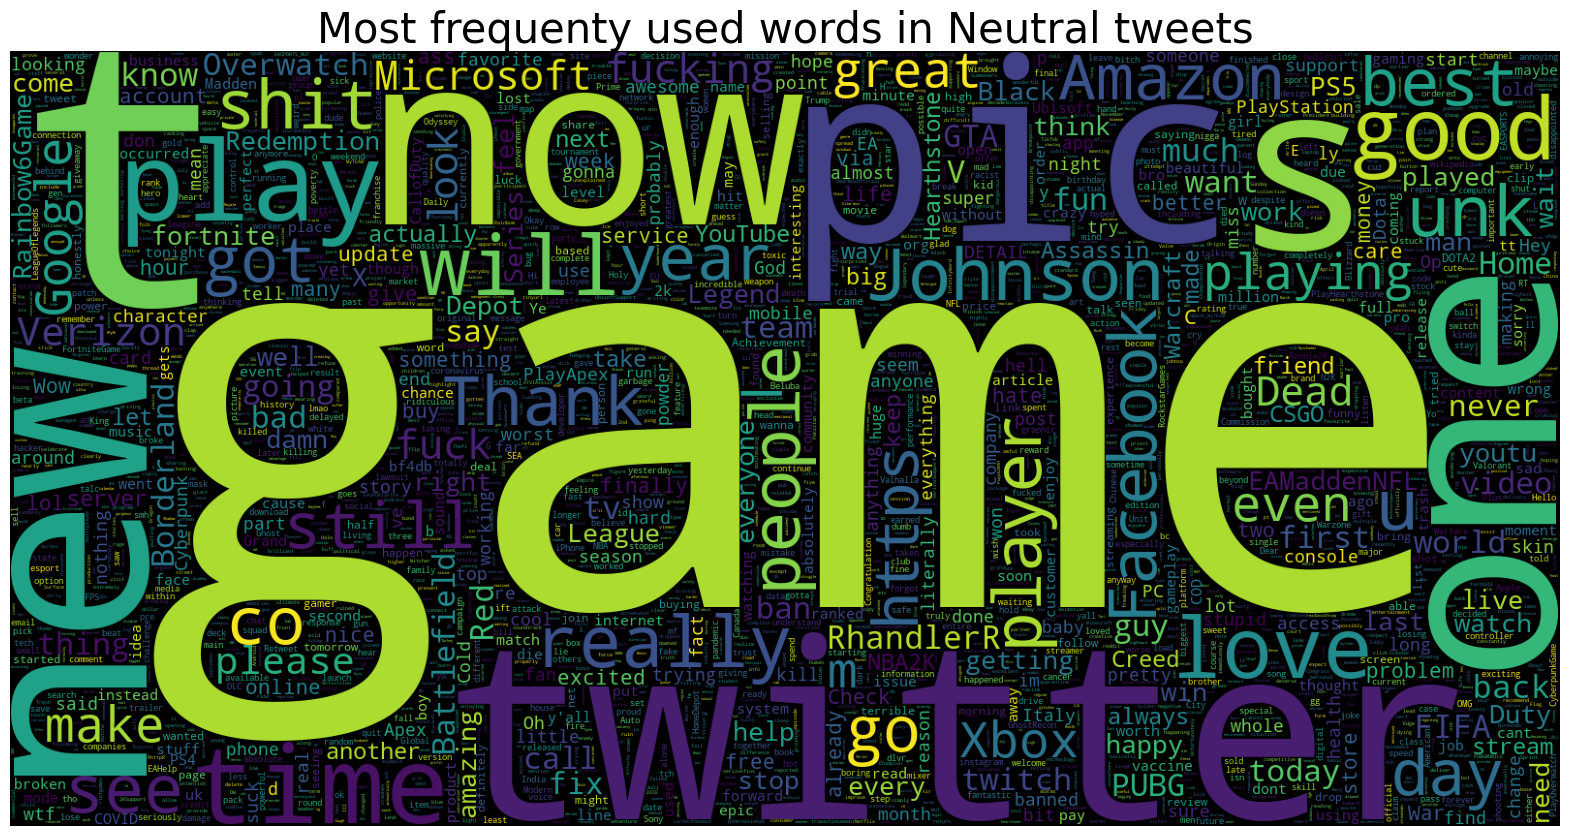

In [143]:
neutral_data = Train_data['Massage'][:70000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 10000, width = 1600, height=800, collocations=False).generate(" ".join(neutral_data))
plt.axis('off')
plt.title('Most frequenty used words in Neutral tweets',fontsize = 30)
plt.imshow(wc)

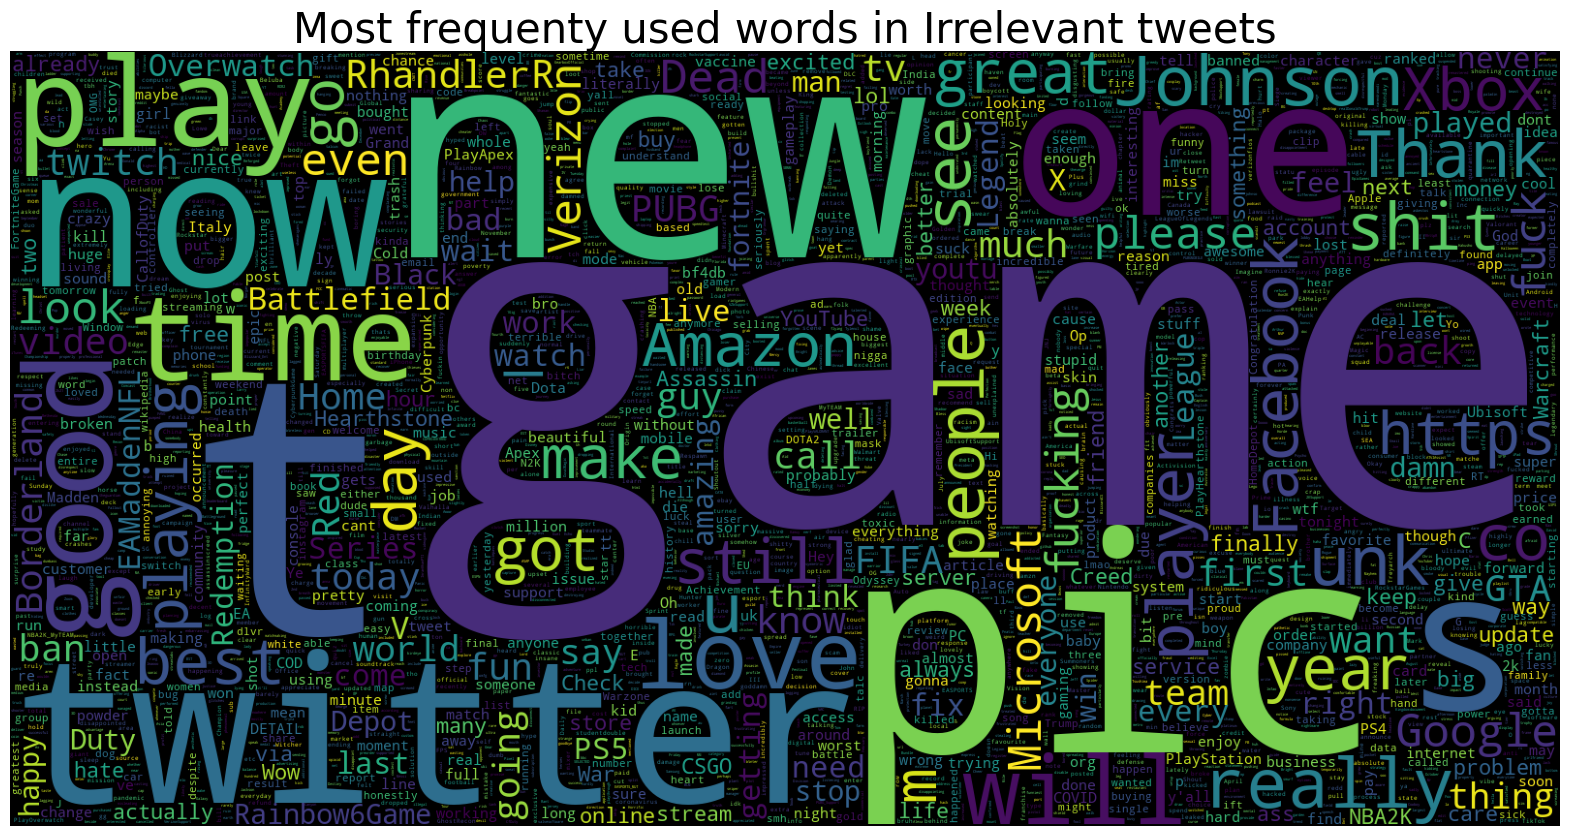

In [144]:
irrel_data = Train_data['Massage'][:70000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 10000, width = 1600, height=800, collocations=False).generate(" ".join(irrel_data))
plt.axis('off')
plt.title('Most frequenty used words in Irrelevant tweets',fontsize = 30)
plt.imshow(wc)

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05, random_state=2610511)

**3.FEATURE EXTRACTION**

In [146]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=328522)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  326852


In [147]:
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

**4.MODEL SELECTION**

In [148]:
def model_Evaluate(model):
    y_pred=model.predict(X_test)
    print(classification_report(Y_test, y_pred))
    cf_matrix = confusion_matrix(Y_test,y_pred)
    categories = ['Negative','Positive']
    group_names=['True Neg','False Pos','False Neg','True Pos'] #'True Neutral','Irrelevant','False Neutral']
    group_percentage= ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentage)]
    labels= np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)



**5.MODEL TRAINING**

C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

              precision    recall  f1-score   support

  Irrelevant       0.97      0.92      0.95       655
    Negative       0.96      0.95      0.95      1120
     Neutral       0.96      0.94      0.95       870
    Positive       0.92      0.96      0.94      1055

    accuracy                           0.95      3700
   macro avg       0.95      0.94      0.95      3700
weighted avg       0.95      0.95      0.95      3700



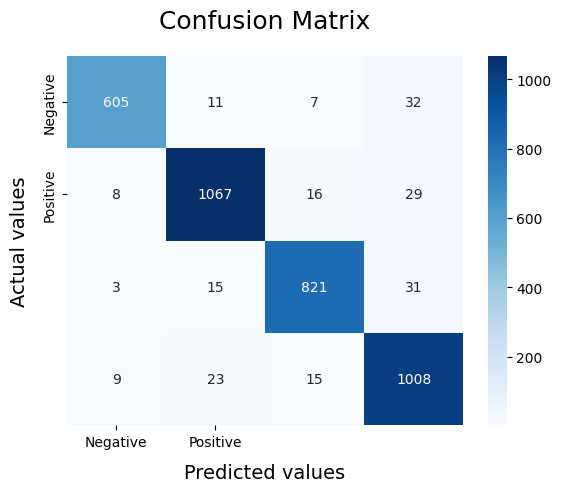

In [149]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
model_Evaluate(SVCmodel)
y_pred1= SVCmodel.predict(X_test)

**6.MODEL EVALUATION**

In [150]:
print(confusion_matrix(Y_test, y_pred1))
print("\n")
print(classification_report(Y_test, y_pred1))

C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

[[ 605   11    7   32]
 [   8 1067   16   29]
 [   3   15  821   31]
 [   9   23   15 1008]]


              precision    recall  f1-score   support

  Irrelevant       0.97      0.92      0.95       655
    Negative       0.96      0.95      0.95      1120
     Neutral       0.96      0.94      0.95       870
    Positive       0.92      0.96      0.94      1055

    accuracy                           0.95      3700
   macro avg       0.95      0.94      0.95      3700
weighted avg       0.95      0.95      0.95      3700



In [151]:
logreg_acc = accuracy_score(y_pred1, Y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.62%


C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers